In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Step 2: Load the dataset
file_path = r"C:\Users\lenovo\Desktop\task 4\twitter_training.csv"
df = pd.read_csv(file_path, header=None)

In [5]:
# Step 3: Inspect data
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
# Step 4: Rename columns (based on file format)
df.columns = ['ID', 'Entity', 'Sentiment', 'Text']


In [9]:
# Display shape and basic info
print("Shape:", df.shape)
df.info()

Shape: (74682, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


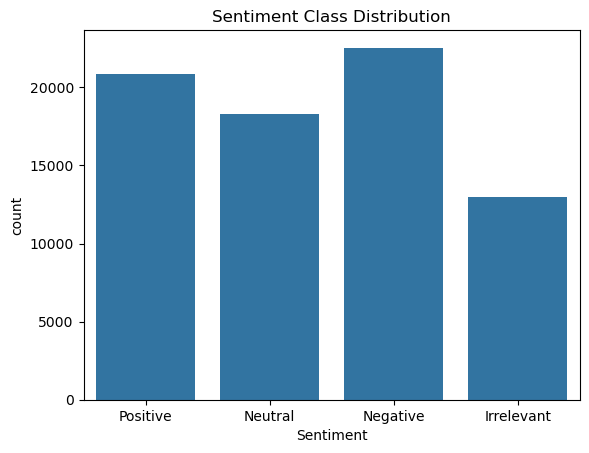

In [11]:
# Step 5: Check class distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Class Distribution')
plt.show()

In [13]:
df['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [15]:
# Step 6: Preprocessing the text
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [21]:
# Step 6 (Fixed): Preprocessing the text
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text)  # Ensure it's string
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"@\w+", "", text)         # remove mentions
    text = re.sub(r"#\w+", "", text)         # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # keep only letters and spaces
    return text.lower().strip()

# Apply the cleaning
df['Clean_Text'] = df['Text'].apply(clean_text)

# View cleaned text
df[['Text', 'Clean_Text']].head()


,Text,Clean_Text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [23]:
# Step 7: Encode Labels and split
X = df['Clean_Text']
y = df['Sentiment']

In [25]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X_vec = vectorizer.fit_transform(X)


In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [29]:
# Step 8: Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Step 9: Evaluate Model
y_pred = model.predict(X_test)

In [33]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.60      0.46      0.52      2592
    Negative       0.69      0.75      0.72      4519
     Neutral       0.58      0.59      0.59      3596
    Positive       0.66      0.69      0.68      4230

    accuracy                           0.64     14937
   macro avg       0.63      0.62      0.63     14937
weighted avg       0.64      0.64      0.64     14937



In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6447747204927362


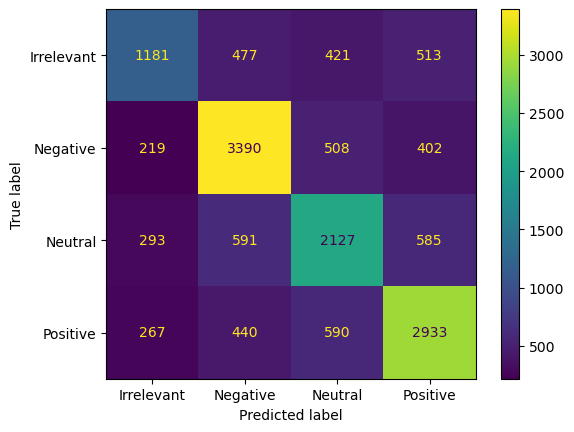

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()